epoch: 10, loss = 4117.2500
epoch: 20, loss = 2899.8962
epoch: 30, loss = 2070.1365
epoch: 40, loss = 1504.4426
epoch: 50, loss = 1118.6958
epoch: 60, loss = 855.6005
epoch: 70, loss = 676.1223
epoch: 80, loss = 553.6612
epoch: 90, loss = 470.0881
epoch: 100, loss = 413.0431


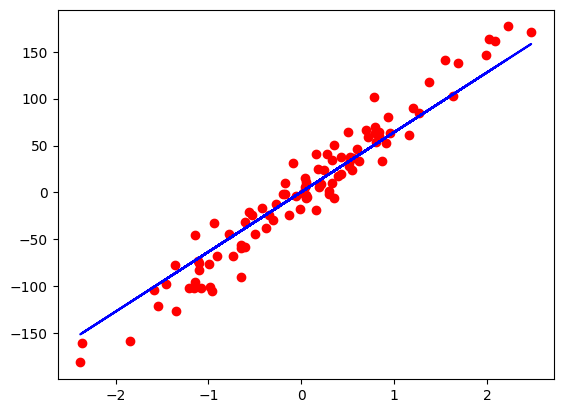

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)
y = y.view(y.shape[0], 1) # make id to 2d array
print(y.shape)

# .view(...): This method reshapes the tensor y to a new shape.
# (y.shape[0], 1): This is the new shape.
# Shape Explanation:
# y.shape[0]: This refers to the first dimension of the original tensor y, which is typically the batch size or the number of samples.
# 1: This specifies that the second dimension should have a size of 1.
# Purpose:

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1


model = nn.Linear(input_size, output_size)  # liner nn flatten input 

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss() # mse loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()  # dl_dw
    optimizer.step() # w -= lr * dl_dw

    # zero grad before new step
    optimizer.zero_grad() # dl_dw = 0

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy() # detach() use not to calculate gradient or with torch.no_grad():

plt.plot(X_numpy, y_numpy, 'ro') # red 
plt.plot(X_numpy, predicted, 'b') # blue
plt.show()